In [21]:
#Adding imports
import csv
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv file 
csv_filename = "AusApparalSales4thQrt2020.csv"
df = pd.read_csv(csv_filename)

In [22]:
# Performing Data Wrangling to ensure data is clean 
pd.notna(csv_filename)
pd.isna(csv_filename)

# Dates October 31, 2020 and December 31, 2020 are missing from the given records. 
# Adding those dates here to ensure accurate data analysis.
all_dates = []
for i in pd.date_range(start = '1-Oct-2020' , end = '31-Dec-2020'):
    i = i.strftime('%d-%b-%Y')
    if i[0] == '0':
        i = i[1:]

    all_dates.append(i)
set(all_dates) - set(df['Date']) 

{'31-Dec-2020', '31-Oct-2020'}

Basic Statistical Summary:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

Extended Statistical Analysis:
                                     Sales        Unit
Mean                          4.501356e+04   18.005423
Median                        3.500000e+04   14.000000
Mode                          2.250000e+04    9.000000
Standard Deviation            3.225351e+04   12.901403
Variance                      1.040289e+09  166.446194
Range                         1.575000e+05   63.000000
IQR                           4.500000e+04   18.000000
Coefficient of Variation (%)  7.165287e+01   71.652871
Skewness                      1.085550e+00    1.085550
Kurtosis                      6.614172e-01    0.661417


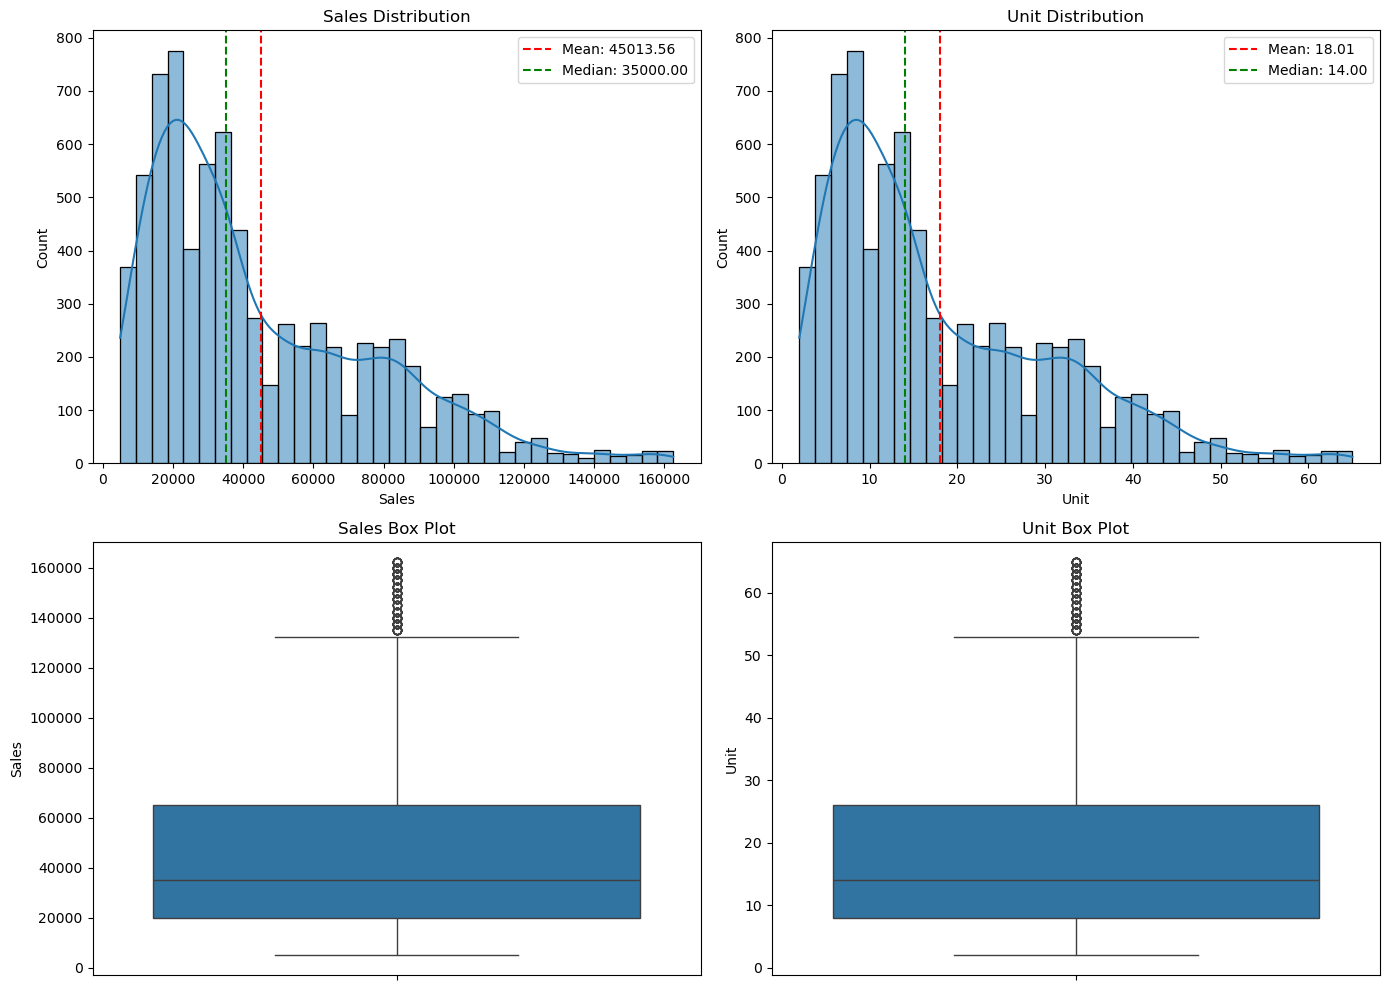

In [23]:
# Performing data analysis

# Getting basic statistical summary with describe()
stats_summary = df[['Sales', 'Unit']].describe()

# Add additional statistical measures
# Mode (most frequent value)
sales_mode = stats.mode(df['Sales'], keepdims=True)
unit_mode = stats.mode(df['Unit'], keepdims=True)

# Skewness and Kurtosis
sales_skew = df['Sales'].skew()
sales_kurt = df['Sales'].kurtosis()
unit_skew = df['Unit'].skew()
unit_kurt = df['Unit'].kurtosis()

# Range
sales_range = df['Sales'].max() - df['Sales'].min()
unit_range = df['Unit'].max() - df['Unit'].min()

# Interquartile Range (IQR)
sales_iqr = df['Sales'].quantile(0.75) - df['Sales'].quantile(0.25)
unit_iqr = df['Unit'].quantile(0.75) - df['Unit'].quantile(0.25)

# Coefficient of Variation (CV)
sales_cv = (df['Sales'].std() / df['Sales'].mean()) * 100
unit_cv = (df['Unit'].std() / df['Unit'].mean()) * 100

# Create a comprehensive statistics dataframe
extended_stats = pd.DataFrame({
    'Sales': [
        df['Sales'].mean(),
        df['Sales'].median(),
        sales_mode[0][0],
        df['Sales'].std(),
        df['Sales'].var(),
        sales_range,
        sales_iqr,
        sales_cv,
        sales_skew,
        sales_kurt
    ],
    'Unit': [
        df['Unit'].mean(),
        df['Unit'].median(),
        unit_mode[0][0],
        df['Unit'].std(),
        df['Unit'].var(),
        unit_range,
        unit_iqr,
        unit_cv,
        unit_skew,
        unit_kurt
    ]
}, index=[
    'Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance',
    'Range', 'IQR', 'Coefficient of Variation (%)', 'Skewness', 'Kurtosis'
])

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms
sns.histplot(df['Sales'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution')
axes[0, 0].axvline(df['Sales'].mean(), color='red', linestyle='--', label=f'Mean: {df["Sales"].mean():.2f}')
axes[0, 0].axvline(df['Sales'].median(), color='green', linestyle='--', label=f'Median: {df["Sales"].median():.2f}')
axes[0, 0].legend()

sns.histplot(df['Unit'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Unit Distribution')
axes[0, 1].axvline(df['Unit'].mean(), color='red', linestyle='--', label=f'Mean: {df["Unit"].mean():.2f}')
axes[0, 1].axvline(df['Unit'].median(), color='green', linestyle='--', label=f'Median: {df["Unit"].median():.2f}')
axes[0, 1].legend()

# Box plots
sns.boxplot(y=df['Sales'], ax=axes[1, 0])
axes[1, 0].set_title('Sales Box Plot')

sns.boxplot(y=df['Unit'], ax=axes[1, 1])
axes[1, 1].set_title('Unit Box Plot')

plt.tight_layout()

# Display the statistical summaries
print("Basic Statistical Summary:")
print(stats_summary)
print("\nExtended Statistical Analysis:")
print(extended_stats)

# Display the visualizations
plt.show()

Group Analysis Results:
Group with highest sales:  Men ($85,750,000.00)
Group with lowest sales:  Seniors ($84,037,500.00)
The highest selling group outperforms the lowest by 2.0%

Detailed Summary:
         Total Sales   Status
Group                        
Men         85750000  Highest
Seniors     84037500   Lowest


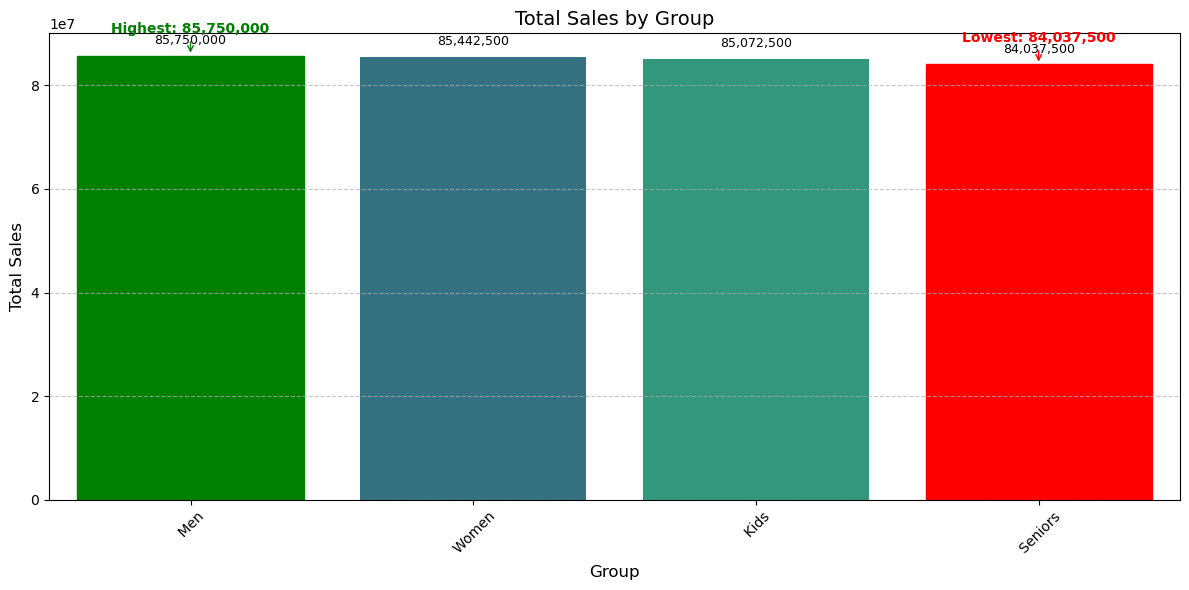

In [24]:
# Identifying the group with the highest sales & lowest sales

# Calculate total sales by group
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Identify highest and lowest sales groups
highest_group = group_sales.index[0]
highest_sales = group_sales.iloc[0]
lowest_group = group_sales.index[-1]
lowest_sales = group_sales.iloc[-1]

# Create a summary DataFrame for display
summary = pd.DataFrame({
    'Group': [highest_group, lowest_group],
    'Total Sales': [highest_sales, lowest_sales],
    'Status': ['Highest', 'Lowest']
}).set_index('Group')

# Calculate percentage difference between highest and lowest
percent_diff = ((highest_sales - lowest_sales) / lowest_sales) * 100

# Create a visualization
plt.figure(figsize=(12, 6))

# Bar chart of all groups
ax = sns.barplot(x=group_sales.index, y=group_sales.values, palette='viridis', hue=group_sales.index)

# Highlight the highest and lowest groups
highest_bar_color = 'green'
lowest_bar_color = 'red'
bars = ax.patches
bars[0].set_color(highest_bar_color)  # Highest
bars[-1].set_color(lowest_bar_color)  # Lowest

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02*max(group_sales),
            f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

# Add annotations for highest and lowest
ax.annotate(f'Highest: {highest_sales:,.0f}', 
            xy=(0, highest_sales), 
            xytext=(0, highest_sales + 0.05*max(group_sales)),
            ha='center', 
            fontweight='bold', 
            color=highest_bar_color,
            arrowprops=dict(arrowstyle='->', color=highest_bar_color))

ax.annotate(f'Lowest: {lowest_sales:,.0f}', 
            xy=(len(group_sales)-1, lowest_sales), 
            xytext=(len(group_sales)-1, lowest_sales + 0.05*max(group_sales)),
            ha='center', 
            fontweight='bold', 
            color=lowest_bar_color,
            arrowprops=dict(arrowstyle='->', color=lowest_bar_color))

plt.title('Total Sales by Group', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Print the results
print(f"Group Analysis Results:")
print(f"Group with highest sales: {highest_group} (${highest_sales:,.2f})")
print(f"Group with lowest sales: {lowest_group} (${lowest_sales:,.2f})")
print(f"The highest selling group outperforms the lowest by {percent_diff:.1f}%")
print("\nDetailed Summary:")
print(summary)

# Show the plot
plt.show()

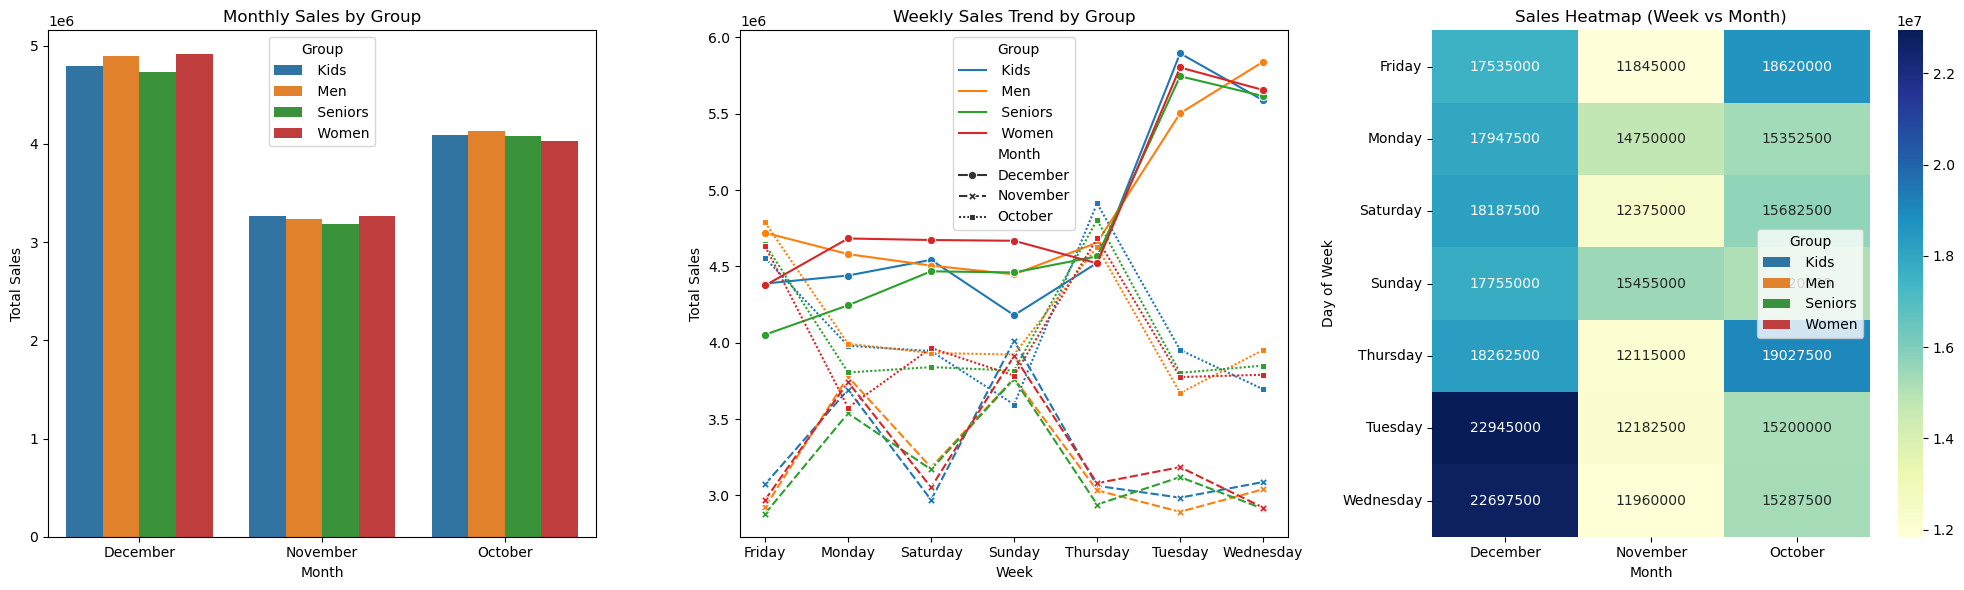

Figure 1 (left) compares Monthly Sales between the groups
Figure 2 (middle) showcases the Weekly trend between the groups
Figure 3 (right) displays the dense patterns across the different groups


In [25]:
# Generateing weekly, monthly, and quarterly reports

# Convert 'Date' column to datetime format for proper date manipulation
df['Date'] = pd.to_datetime(df['Date']) 
# Extract day name (Monday, Tuesday, etc.) from the date and create a new 'Week' column
df['Week'] = df['Date'].dt.day_name() 
# Extract month name (January, February, etc.) from the date and create a new 'Month' column
df['Month'] = df['Date'].dt.month_name()

# Grouping the dataframe
report = df.groupby(['Month','Week','Group']).agg({'Sales' : 'sum'})

#Creating a figure with mutliple subplots
fig, axes = plt.subplots(1,3, figsize=(20,6))

# Figure 1: Barplot of Sales per group By Month
sns.barplot(data=report, x='Month', y='Sales', hue='Group', errorbar=None, ax=axes[0])  
axes[0].set_title("Monthly Sales by Group")
axes[0].set_ylabel("Total Sales")
axes[0].set_xlabel("Month")                         

sns.barplot(data=report, x='Month', y='Sales', hue='Group', errorbar=None)
plt.title("Monthly Sales by Group")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.legend(title="Group")

# Figure 2: Lineplot of Weekly Sales trend by group

sns.lineplot(data=report, x='Week', y='Sales', hue='Group', style='Month', markers=True, ax=axes[1])
axes[1].set_title("Weekly Sales Trend by Group")
axes[1].set_ylabel("Total Sales")
axes[1].set_xlabel("Week")
plt.title("Weekly Sales Trend by Group")
plt.ylabel("Total Sales")
plt.xlabel("Week")

# Figure 3: Heatmap (Month vs Week, Sales intensity)
pivot = report.pivot_table(index='Week', columns='Month', values='Sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Sales Heatmap (Week vs Month)")
axes[2].set_ylabel("Day of Week")
axes[2].set_xlabel("Month")

plt.tight_layout()
plt.show()
print("Figure 1 (left) compares Monthly Sales between the groups")
print("Figure 2 (middle) showcases the Weekly trend between the groups")
print("Figure 3 (right) displays the dense patterns across the different groups")

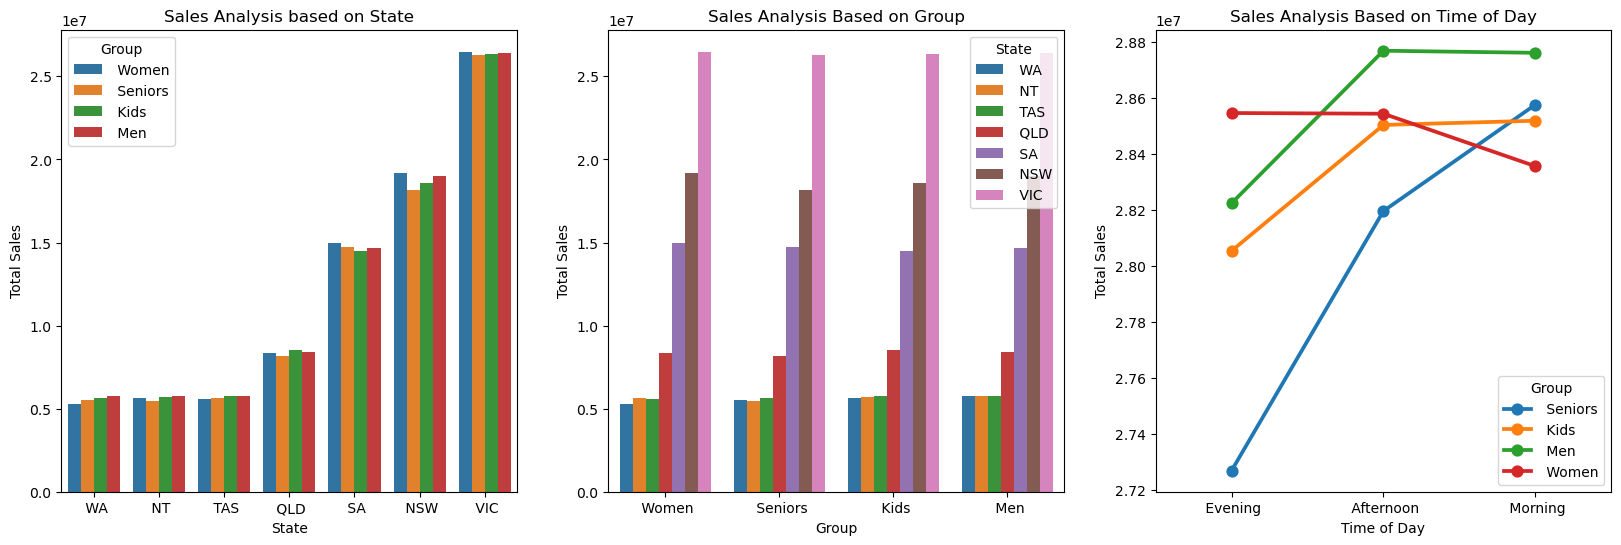

Using box charts on Figures 1 and 2 to compare Sales between States/Demographic Groups.
Using pointplot in Figure 3 to visualize Sales over a period of time.


In [26]:
# Visualizing date based various metrics such as State, Demogrphic (group), and Time of Day

# Figure 1: Sales Analysis Based on State
report = df.groupby(['Group','State']).agg({'Sales' : 'sum'}).sort_values(['Sales'])
fig, axes = plt.subplots(1,3, figsize=(20,6))
sns.barplot(data=report, x='State', y='Sales', hue='Group', errorbar=None, ax=axes[0])
axes[0].set_title("Sales Analysis based on State")
axes[0].set_ylabel("Total Sales")
axes[0].set_xlabel("State")    
plt.title("Sales Analysis based on State")
plt.ylabel("Total Sales")
plt.xlabel("State")

# Figure 2: Sales Analysis Based on Group
report2 = df.groupby(['State','Group']).agg({'Sales' : 'sum'}).sort_values(['Sales'])
sns.barplot(data=report2, x='Group', y='Sales', hue='State', errorbar=None, ax=axes[1])
axes[1].set_title("Sales Analysis Based on Group")
axes[1].set_ylabel("Total Sales")
axes[1].set_xlabel("Group")
plt.title("Sales Analysis Based on Group")
plt.ylabel("Total Sales")
plt.xlabel("Group")

# Figure 3: Time of Day Sales Analysis
report3 = df.groupby(['Group','Time']).agg({'Sales' : 'sum'}).sort_values(['Sales'])
sns.pointplot(data=report3, x='Time', y='Sales', hue='Group', markers="o", linestyles="-", ax=axes[2])
plt.title("Sales Analysis Based on Time of Day")
plt.ylabel("Total Sales")
plt.xlabel("Time of Day")

plt.show()
print("Using box charts on Figures 1 and 2 to compare Sales between States/Demographic Groups.")
print("Using pointplot in Figure 3 to visualize Sales over a period of time.")